In [1]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {
    border: 1px  black solid !important;
  color: black !important;
}

In [405]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [4]:
df = pd.read_csv('ds_glassdoor_jobs.csv')
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
0,Data Scientist,$108K-$145K (Glassdoor est.),"Secure our Nation, Ignite your Future\n\nSumma...",4.1,ManTech\n4.1,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,Company - Public,Research & Development,Business Services,$1 to $2 billion (USD),-1
1,Data Scientist,$108K-$145K (Glassdoor est.),Who We Are\n\nWere Americas largest mortgage l...,3.9,Quicken Loans\n3.9,"Detroit, MI","Detroit, MI",10000+ employees,1985,Company - Private,Lending,Finance,$10+ billion (USD),"Citi, Bank of America, Wells Fargo"
2,Data Scientist,$108K-$145K (Glassdoor est.),GEICO’s Data Science team uses predictive anal...,3.3,GEICO\n3.3,"Chevy Chase, MD","Washington, DC",10000+ employees,1936,Subsidiary or Business Segment,Insurance Carriers,Insurance,$10+ billion (USD),-1
3,Data Scientist,$108K-$145K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310781\n\n...,3.8,Pacific Northwest National Laboratory\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa..."
4,Data Scientist,$108K-$145K (Glassdoor est.),JOB CATEGORY:\n\nInformation Services\n\nREQUI...,3.9,Mars\n3.9,New York State,"Mc Lean, VA",10000+ employees,1911,Company - Private,Food & Beverage Manufacturing,Manufacturing,$10+ billion (USD),-1


In [20]:
df['Salary Estimate'].value_counts()

-1                              133
$60K-$100K (Glassdoor est.)      35
$69K-$113K (Glassdoor est.)      34
$108K-$145K (Glassdoor est.)     30
$67K-$109K (Glassdoor est.)      25
                               ... 
$62K-$114K (Glassdoor est.)       1
$63K-$99K (Glassdoor est.)        1
$65K-$124K (Glassdoor est.)       1
$66K-$117K (Glassdoor est.)       1
$108K-$146K (Glassdoor est.)      1
Name: Salary Estimate, Length: 502, dtype: int64

Dropping rows where the salary estimate in null

In [27]:
df = df[df['Salary Estimate'] != '-1']

Averaging out the salary

In [28]:
df.shape

(1119, 14)

In [57]:
df['Salary Estimate'].unique()

array(['$108K-$145K (Glassdoor est.)', '$69K-$113K (Glassdoor est.)',
       '$60K-$100K (Glassdoor est.)', '$49K-$85K (Glassdoor est.)',
       '$53K-$91K (Glassdoor est.)', '$63K-$112K (Glassdoor est.)',
       '$80K-$90K (Glassdoor est.)', '$56K-$97K (Glassdoor est.)',
       '$86K-$143K (Glassdoor est.)', '$71K-$119K (Glassdoor est.)',
       '$54K-$93K (Glassdoor est.)', '$86K-$142K (Glassdoor est.)',
       '$38K-$84K (Glassdoor est.)', '$120K-$160K (Glassdoor est.)',
       '$126K-$201K (Glassdoor est.)', '$64K-$106K (Glassdoor est.)',
       '$106K-$172K (Glassdoor est.)', '$46K-$85K (Glassdoor est.)',
       '$83K-$144K (Glassdoor est.)', '$102K-$190K (Glassdoor est.)',
       '$67K-$137K (Glassdoor est.)', '$118K-$189K (Glassdoor est.)',
       '$110K-$175K (Glassdoor est.)', '$64K-$111K (Glassdoor est.)',
       '$81K-$130K (Glassdoor est.)', '$73K-$119K (Glassdoor est.)',
       '$86K-$139K (Glassdoor est.)', '$63K-$105K (Glassdoor est.)',
       '$109K-$177K (Glassdoor est

In [50]:
df.loc[df['Salary Estimate'] == 'Employer Provided Salary:$120K-$145K']

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
258,Data Engineer,Employer Provided Salary:$120K-$145K,"Location: Tampa, FL\nTitle: Data Engineer\nTS/...",5.0,Gridiron IT\n5.0,"Tampa, FL","Reston, VA",51 to 200 employees,2017,Company - Private,IT Services,Information Technology,Unknown / Non-Applicable,-1
667,"Principal Research Scientist/Team Lead, Medici...",Employer Provided Salary:$120K-$145K,"Principal Research Scientist/Team Lead, Medici...",-1.0,Kronos Bio,"Cambridge, MA","San Mateo, CA",Unknown,-1,Company - Private,-1,-1,Unknown / Non-Applicable,-1


In [51]:
df.loc[258, 'Salary Estimate'] = '$120K-$145K'

In [53]:
df.loc[667, 'Salary Estimate'] = '$120K-$145K'

In [55]:
df.loc[df['Salary Estimate'] == 'Employer Provided Salary:$200K-$250K']

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
303,Principal Data Scientist with over 10 years ex...,Employer Provided Salary:$200K-$250K,Position Title: Principal Data Scientist\nLoca...,-1.0,CA-One Tech Cloud,"San Francisco, CA","Fremont, CA",51 to 200 employees,2017,Company - Private,IT Services,Information Technology,$5 to $10 million (USD),-1


In [56]:
df.loc[303, 'Salary Estimate'] = '$200K-$250K'

In [58]:
df.loc[df['Salary Estimate'] == '$21-$34 Per Hour(Glassdoor est.)']

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
304,MED TECH/LAB SCIENTIST - LABORATORY,$21-$34 Per Hour(Glassdoor est.),Evening: 3P-1130P or Night Shift 11P-730A\n\nI...,3.6,Beebe Healthcare\n3.6,"Lewes, DE","Lewes, DE",1001 to 5000 employees,1935,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$100 to $500 million (USD),-1
342,MED TECH/LAB SCIENTIST- SOUTH COASTAL LAB,$21-$34 Per Hour(Glassdoor est.),Day Shift: 7A-330P. Holidays and every other w...,3.6,Beebe Healthcare\n3.6,"Millville, DE","Lewes, DE",1001 to 5000 employees,1935,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$100 to $500 million (USD),-1


In [59]:
df.loc[304,'Job Title']

'MED TECH/LAB SCIENTIST - LABORATORY'

In [60]:
df.reset_index(inplace = True)
df.head()

,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
0,0,Data Scientist,$108K-$145K (Glassdoor est.),"Secure our Nation, Ignite your Future\n\nSumma...",4.1,ManTech\n4.1,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,Company - Public,Research & Development,Business Services,$1 to $2 billion (USD),-1
1,1,Data Scientist,$108K-$145K (Glassdoor est.),Who We Are\n\nWere Americas largest mortgage l...,3.9,Quicken Loans\n3.9,"Detroit, MI","Detroit, MI",10000+ employees,1985,Company - Private,Lending,Finance,$10+ billion (USD),"Citi, Bank of America, Wells Fargo"
2,2,Data Scientist,$108K-$145K (Glassdoor est.),GEICO’s Data Science team uses predictive anal...,3.3,GEICO\n3.3,"Chevy Chase, MD","Washington, DC",10000+ employees,1936,Subsidiary or Business Segment,Insurance Carriers,Insurance,$10+ billion (USD),-1
3,3,Data Scientist,$108K-$145K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310781\n\n...,3.8,Pacific Northwest National Laboratory\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa..."
4,4,Data Scientist,$108K-$145K (Glassdoor est.),JOB CATEGORY:\n\nInformation Services\n\nREQUI...,3.9,Mars\n3.9,New York State,"Mc Lean, VA",10000+ employees,1911,Company - Private,Food & Beverage Manufacturing,Manufacturing,$10+ billion (USD),-1


In [61]:
df.drop('index', axis = 1, inplace = True)

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [122]:
df['Salary Estimate'].unique()

array(['$108K-$145K (Glassdoor est.)', '$69K-$113K (Glassdoor est.)',
       '$60K-$100K (Glassdoor est.)', '$49K-$85K (Glassdoor est.)',
       '$53K-$91K (Glassdoor est.)', '$63K-$112K (Glassdoor est.)',
       '$80K-$90K (Glassdoor est.)', '$56K-$97K (Glassdoor est.)',
       '$86K-$143K (Glassdoor est.)', '$71K-$119K (Glassdoor est.)',
       '$54K-$93K (Glassdoor est.)', '$86K-$142K (Glassdoor est.)',
       '$38K-$84K (Glassdoor est.)', '$120K-$160K (Glassdoor est.)',
       '$126K-$201K (Glassdoor est.)', '$64K-$106K (Glassdoor est.)',
       '$106K-$172K (Glassdoor est.)', '$46K-$85K (Glassdoor est.)',
       '$83K-$144K (Glassdoor est.)', '$102K-$190K (Glassdoor est.)',
       '$67K-$137K (Glassdoor est.)', '$118K-$189K (Glassdoor est.)',
       '$110K-$175K (Glassdoor est.)', '$64K-$111K (Glassdoor est.)',
       '$81K-$130K (Glassdoor est.)', '$73K-$119K (Glassdoor est.)',
       '$86K-$139K (Glassdoor est.)', '$63K-$105K (Glassdoor est.)',
       '$109K-$177K (Glassdoor est

In [74]:
df.loc[df['Salary Estimate'] == '$21-$34 Per Hour(Glassdoor est.)']

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors


In [73]:
df.drop([272,297], inplace = True)

In [78]:
df.drop(260, inplace = True)

In [85]:
df.loc[df['Salary Estimate'] == '$18-$25 Per Hour(Glassdoor est.)']

,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
290,292,Medical Laboratory Scientist,$18-$25 Per Hour(Glassdoor est.),Description\nMedical Laboratory Scientist - Te...,4.0,Texas Health Huguley Hospital\n4.0,"Burleson, TX","Arlington, TX",1001 to 5000 employees,1977,Hospital,Health Care Services & Hospitals,Health Care,$50 to $100 million (USD),-1


In [84]:
df.reset_index(inplace = True)

In [87]:
df.drop(290, inplace = True)

In [90]:
df.reset_index(inplace = True)

In [91]:
df.loc[df['Salary Estimate'] ==  '$15-$25 Per Hour(Glassdoor est.)']

,level_0,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
300,301,304,Medical Technologist / Clinical Laboratory Sci...,$15-$25 Per Hour(Glassdoor est.),The incumbent performs a broad range of labora...,3.4,"Veterans Affairs, Veterans Health Administrati...","New Orleans, LA","Washington, DC",10000+ employees,1930,Government,Federal Agencies,Government,Unknown / Non-Applicable,-1


In [92]:
df.drop(300, inplace = True)

In [94]:
df.loc[df['Salary Estimate'] == 'Employer Provided Salary:$120K-$140K']

,level_0,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
564,565,568,Senior Data Scientist,Employer Provided Salary:$120K-$140K,"SkySync is a dynamic, fast-paced, venture-back...",5.0,SkySync\n5.0,"Ann Arbor, MI","Ann Arbor, MI",51 to 200 employees,2011,Company - Private,Computer Hardware & Software,Information Technology,Unknown / Non-Applicable,-1


In [96]:
df.loc[564, 'Salary Estimate'] = '$120K-140K'

In [98]:
df.loc[df['Salary Estimate'] == 'Employer Provided Salary:$100K-$135K']

,level_0,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
524,525,528,"Scientist – Cancer Discovery, Molecular Assay",Employer Provided Salary:$100K-$135K,"Scientist – Cancer Discovery, Molecular Assay\...",-1.0,Monte Rosa Therapeutics,"Cambridge, MA",-1,-1,-1,-1,-1,-1,-1,-1


In [100]:
df.loc[524, 'Salary Estimate'] = '$100K-$135K'

In [101]:
df.loc[df['Salary Estimate'] == '$27-$47 Per Hour(Glassdoor est.)']

,level_0,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
551,552,555,"Clinical Scientist, Clinical Development",$27-$47 Per Hour(Glassdoor est.),Job Summary:\n\nThis position reports to the D...,3.8,FORMA THERAPEUTICS\n3.8,"Watertown, MA","Watertown, MA",51 to 200 employees,2008,Company - Private,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,$10 to $25 million (USD),-1


In [103]:
df.drop(551, inplace = True)

In [104]:
df.loc[df['Salary Estimate'] == '$10-$17 Per Hour(Glassdoor est.)']

,level_0,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
431,432,435,"Senior Operations Data Analyst, Call Center Op...",$10-$17 Per Hour(Glassdoor est.),Summary\n\n\nIndependent contributor role that...,2.7,FLEETCOR\n2.7,"Nashville, TN","Peachtree Corners, GA",5001 to 10000 employees,2000,Company - Public,Financial Transaction Processing,Finance,$2 to $5 billion (USD),-1


In [106]:
df.drop(431, inplace = True)

In [107]:
df.loc[df['Salary Estimate'] == 'Employer Provided Salary:$110K-$130K']

,level_0,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
426,427,430,"Senior Scientist, Cell Pharmacology/Assay Deve...",Employer Provided Salary:$110K-$130K,"Senior Scientist, Cell Pharmacology/Assay Deve...",-1.0,Kronos Bio,"Cambridge, MA","San Mateo, CA",Unknown,-1,Company - Private,-1,-1,Unknown / Non-Applicable,-1


In [111]:
df.drop(426, inplace = True)

In [112]:
df.loc[df['Salary Estimate'] == 'Employer Provided Salary:$100K-$140K']

,level_0,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
397,398,401,"Research Scientist, Immunology - Cancer Biology",Employer Provided Salary:$100K-$140K,"Research Scientist, Immunology - Cancer Biolog...",-1.0,Kronos Bio,"Cambridge, MA","San Mateo, CA",Unknown,-1,Company - Private,-1,-1,Unknown / Non-Applicable,-1


In [113]:
df.loc[df['Salary Estimate'] == 'Employer Provided Salary:$25-$28 Per Hour']

,level_0,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
390,391,394,ENVIRONMENTAL ENGINEER/SCIENTIST,Employer Provided Salary:$25-$28 Per Hour,"McPhail Associates, LLC is a geotechnical and ...",3.3,Mcphail Associates\n3.3,"Cambridge, MA","Cambridge, MA",1 to 50 employees,1976,Company - Private,Construction,"Construction, Repair & Maintenance",Unknown / Non-Applicable,-1


In [116]:
df.loc[df['Salary Estimate'] == '$24-$39 Per Hour(Glassdoor est.)']

,level_0,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
378,379,382,Clinical Laboratory Scientist,$24-$39 Per Hour(Glassdoor est.),POSITION PURPOSE:\nPerforms CLIA moderate and ...,3.7,Vail Health\n3.7,"Vail, CO","Vail, CO",501 to 1000 employees,1966,Hospital,Health Care Services & Hospitals,Health Care,$100 to $500 million (USD),-1


In [118]:
df.drop([378,390,397], inplace = True)

In [119]:
df.loc[df['Salary Estimate'] ==  'Employer Provided Salary:$85K-$90K']

,level_0,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
350,351,354,Data Operations Lead,Employer Provided Salary:$85K-$90K,Data Operations Lead\nLocation: Flexible thoug...,-1.0,Muso,"San Francisco, CA","San Francisco, CA",201 to 500 employees,-1,Nonprofit Organization,-1,-1,Unknown / Non-Applicable,-1


In [120]:
df.loc[350, 'Salary Estimate'] = '$85K-$90K'

In [121]:
df.loc[350]

level_0                                                            351
index                                                              354
Job Title                                         Data Operations Lead
Salary Estimate                                              $85K-$90K
Job Description      Data Operations Lead\nLocation: Flexible thoug...
Rating                                                              -1
Company Name                                                      Muso
Location                                             San Francisco, CA
Headquarters                                         San Francisco, CA
Size                                              201 to 500 employees
Founded                                                             -1
Type of ownership                               Nonprofit Organization
Industry                                                            -1
Sector                                                              -1
Revenu

In [123]:
df.loc[df['Salary Estimate'] ==  '$15K-$16K(Employer est.)']

,level_0,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
316,317,320,Data Scientist,$15K-$16K(Employer est.),Learn and work on meaningful initiatives with ...,3.9,NPD\n3.9,"Port Washington, NY","Port Washington, NY",1001 to 5000 employees,1966,Company - Private,Research & Development,Business Services,$100 to $500 million (USD),-1


In [125]:
df.drop(316, inplace = True)

In [128]:
df.drop(['level_0', 'index'], axis = 1, inplace = True)
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
0,Data Scientist,$108K-$145K (Glassdoor est.),"Secure our Nation, Ignite your Future\n\nSumma...",4.1,ManTech\n4.1,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,Company - Public,Research & Development,Business Services,$1 to $2 billion (USD),-1
1,Data Scientist,$108K-$145K (Glassdoor est.),Who We Are\n\nWere Americas largest mortgage l...,3.9,Quicken Loans\n3.9,"Detroit, MI","Detroit, MI",10000+ employees,1985,Company - Private,Lending,Finance,$10+ billion (USD),"Citi, Bank of America, Wells Fargo"
2,Data Scientist,$108K-$145K (Glassdoor est.),GEICO’s Data Science team uses predictive anal...,3.3,GEICO\n3.3,"Chevy Chase, MD","Washington, DC",10000+ employees,1936,Subsidiary or Business Segment,Insurance Carriers,Insurance,$10+ billion (USD),-1
3,Data Scientist,$108K-$145K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310781\n\n...,3.8,Pacific Northwest National Laboratory\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa..."
4,Data Scientist,$108K-$145K (Glassdoor est.),JOB CATEGORY:\n\nInformation Services\n\nREQUI...,3.9,Mars\n3.9,New York State,"Mc Lean, VA",10000+ employees,1911,Company - Private,Food & Beverage Manufacturing,Manufacturing,$10+ billion (USD),-1


In [135]:
df['Salary Estimate'] = [x[:10] for x in df['Salary Estimate']]

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [138]:
df['Salary Estimate'] = [x.replace('$', '') for x in df['Salary Estimate']]

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [140]:
df['Salary Estimate'] = [x.replace('K', '') for x in df['Salary Estimate']]
df['Salary Estimate'] = [x.replace('-', '') for x in df['Salary Estimate']]

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [152]:
df.loc[350, 'Salary Estimate'] = '8590'

In [167]:
df['min_salary'] = [int(x[:2]) if len(x) < 6 else int(x[:3]) for x in df['Salary Estimate']]

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [208]:
df['max_salary'] = [int(x[2:]) if len(x) < 6 else int(x[3:]) for x in df['Salary Estimate']]

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [185]:
df.reset_index(inplace = True)

In [188]:
df.drop([424], inplace = True)

In [211]:
df.drop('index', axis = 1,  inplace = True)

In [213]:
df['avg_salary'] = (df.min_salary+df.max_salary)/2

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [214]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,min_salary,max_salary,avg_salary
0,Data Scientist,108145,"Secure our Nation, Ignite your Future\n\nSumma...",4.1,ManTech\n4.1,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,Company - Public,Research & Development,Business Services,$1 to $2 billion (USD),-1,108,145,126.5
1,Data Scientist,108145,Who We Are\n\nWere Americas largest mortgage l...,3.9,Quicken Loans\n3.9,"Detroit, MI","Detroit, MI",10000+ employees,1985,Company - Private,Lending,Finance,$10+ billion (USD),"Citi, Bank of America, Wells Fargo",108,145,126.5
2,Data Scientist,108145,GEICO’s Data Science team uses predictive anal...,3.3,GEICO\n3.3,"Chevy Chase, MD","Washington, DC",10000+ employees,1936,Subsidiary or Business Segment,Insurance Carriers,Insurance,$10+ billion (USD),-1,108,145,126.5
3,Data Scientist,108145,*Organization and Job ID**\nJob ID: 310781\n\n...,3.8,Pacific Northwest National Laboratory\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa...",108,145,126.5
4,Data Scientist,108145,JOB CATEGORY:\n\nInformation Services\n\nREQUI...,3.9,Mars\n3.9,New York State,"Mc Lean, VA",10000+ employees,1911,Company - Private,Food & Beverage Manufacturing,Manufacturing,$10+ billion (USD),-1,108,145,126.5


###### Cleaning Company Name

In [248]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1106 entries, 0 to 1106
Data columns (total 18 columns):
Job Title            1106 non-null object
Salary Estimate      1106 non-null object
Job Description      1106 non-null object
Rating               1106 non-null float64
Company Name         1106 non-null object
Location             1106 non-null object
Headquarters         1106 non-null object
Size                 1106 non-null object
Founded              1106 non-null int64
Type of ownership    1106 non-null object
Industry             1106 non-null object
Sector               1106 non-null object
Revenue              1106 non-null object
Competitors          1106 non-null object
min_salary           1106 non-null int64
max_salary           1106 non-null int64
avg_salary           1106 non-null float64
CompName             1106 non-null object
dtypes: float64(2), int64(3), object(13)
memory usage: 204.2+ KB


In [249]:
df['CompName'] = [x if x in df['Rating'] < 0 else x[:-4] for x in df['Company Name']]

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [250]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,min_salary,max_salary,avg_salary,CompName
0,Data Scientist,108145,"Secure our Nation, Ignite your Future\n\nSumma...",4.1,ManTech\n4.1,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,Company - Public,Research & Development,Business Services,$1 to $2 billion (USD),-1,108,145,126.5,ManTech
1,Data Scientist,108145,Who We Are\n\nWere Americas largest mortgage l...,3.9,Quicken Loans\n3.9,"Detroit, MI","Detroit, MI",10000+ employees,1985,Company - Private,Lending,Finance,$10+ billion (USD),"Citi, Bank of America, Wells Fargo",108,145,126.5,Quicken Loans
2,Data Scientist,108145,GEICO’s Data Science team uses predictive anal...,3.3,GEICO\n3.3,"Chevy Chase, MD","Washington, DC",10000+ employees,1936,Subsidiary or Business Segment,Insurance Carriers,Insurance,$10+ billion (USD),-1,108,145,126.5,GEICO
3,Data Scientist,108145,*Organization and Job ID**\nJob ID: 310781\n\n...,3.8,Pacific Northwest National Laboratory\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa...",108,145,126.5,Pacific Northwest National Laboratory
4,Data Scientist,108145,JOB CATEGORY:\n\nInformation Services\n\nREQUI...,3.9,Mars\n3.9,New York State,"Mc Lean, VA",10000+ employees,1911,Company - Private,Food & Beverage Manufacturing,Manufacturing,$10+ billion (USD),-1,108,145,126.5,Mars


###### Engingeering Job Location ('te' = Remote)

In [291]:
df['State'] = [x[-2:] for x in df.Location]

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [326]:
df.loc[998, 'State'] = 'CA'

In [333]:
df.State.unique()

array(['VA', 'MI', 'MD', 'WA', 'NY', 'WI', 'MA', 'CO', 'FL', 'DC', 'PA',
       'NE', 'CA', 'MO', 'AL', 'UT', 'WV', 'IL', 'MN', 'TN', 'NC', 'NJ',
       'TX', 'te', 'OK', 'OH', 'NM', 'KY', 'OR', 'CT', 'GA', 'IN', 'LA',
       'AZ', 'ID', 'RI', 'IA', 'SC', 'KS', 'AK', 'VT', 'ME', 'ND'],
      dtype=object)

In [332]:
df.drop(643, inplace = True)

###### Checking if headquarters and job location same place

In [337]:
df['Same_State'] = np.where(df['Location'] == df['Headquarters'] , 1, 0)

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [338]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,min_salary,max_salary,avg_salary,CompName,State,Same_State
0,Data Scientist,108145,"Secure our Nation, Ignite your Future\n\nSumma...",4.1,ManTech\n4.1,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,Company - Public,Research & Development,Business Services,$1 to $2 billion (USD),-1,108,145,126.5,ManTech,VA,0
1,Data Scientist,108145,Who We Are\n\nWere Americas largest mortgage l...,3.9,Quicken Loans\n3.9,"Detroit, MI","Detroit, MI",10000+ employees,1985,Company - Private,Lending,Finance,$10+ billion (USD),"Citi, Bank of America, Wells Fargo",108,145,126.5,Quicken Loans,MI,1
2,Data Scientist,108145,GEICO’s Data Science team uses predictive anal...,3.3,GEICO\n3.3,"Chevy Chase, MD","Washington, DC",10000+ employees,1936,Subsidiary or Business Segment,Insurance Carriers,Insurance,$10+ billion (USD),-1,108,145,126.5,GEICO,MD,0
3,Data Scientist,108145,*Organization and Job ID**\nJob ID: 310781\n\n...,3.8,Pacific Northwest National Laboratory\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa...",108,145,126.5,Pacific Northwest National Laboratory,WA,1
4,Data Scientist,108145,JOB CATEGORY:\n\nInformation Services\n\nREQUI...,3.9,Mars\n3.9,New York State,"Mc Lean, VA",10000+ employees,1911,Company - Private,Food & Beverage Manufacturing,Manufacturing,$10+ billion (USD),-1,108,145,126.5,Mars,NY,0


In [344]:
df['Comp_Age'] = np.where(df['Founded'] >= 0 , 2020 - df['Founded'] , -1)

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [345]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,Sector,Revenue,Competitors,min_salary,max_salary,avg_salary,CompName,State,Same_State,Comp_Age
0,Data Scientist,108145,"Secure our Nation, Ignite your Future\n\nSumma...",4.1,ManTech\n4.1,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,Company - Public,...,Business Services,$1 to $2 billion (USD),-1,108,145,126.5,ManTech,VA,0,52
1,Data Scientist,108145,Who We Are\n\nWere Americas largest mortgage l...,3.9,Quicken Loans\n3.9,"Detroit, MI","Detroit, MI",10000+ employees,1985,Company - Private,...,Finance,$10+ billion (USD),"Citi, Bank of America, Wells Fargo",108,145,126.5,Quicken Loans,MI,1,35
2,Data Scientist,108145,GEICO’s Data Science team uses predictive anal...,3.3,GEICO\n3.3,"Chevy Chase, MD","Washington, DC",10000+ employees,1936,Subsidiary or Business Segment,...,Insurance,$10+ billion (USD),-1,108,145,126.5,GEICO,MD,0,84
3,Data Scientist,108145,*Organization and Job ID**\nJob ID: 310781\n\n...,3.8,Pacific Northwest National Laboratory\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,...,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa...",108,145,126.5,Pacific Northwest National Laboratory,WA,1,55
4,Data Scientist,108145,JOB CATEGORY:\n\nInformation Services\n\nREQUI...,3.9,Mars\n3.9,New York State,"Mc Lean, VA",10000+ employees,1911,Company - Private,...,Manufacturing,$10+ billion (USD),-1,108,145,126.5,Mars,NY,0,109


In [348]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'min_salary', 'max_salary', 'avg_salary', 'CompName', 'State',
       'Same_State', 'Comp_Age'],
      dtype='object')

In [352]:
df['Size'].value_counts()

1001 to 5000 employees     221
201 to 500 employees       194
51 to 200 employees        189
501 to 1000 employees      167
10000+ employees           161
5001 to 10000 employees     85
1 to 50 employees           73
-1                           8
Unknown                      7
Name: Size, dtype: int64

In [356]:
df.loc[df['Size']== 'Unknown', :]

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,Sector,Revenue,Competitors,min_salary,max_salary,avg_salary,CompName,State,Same_State,Comp_Age
150,Data Scientist,150160,"BPA Services, LLC is seeking a Computer/Data S...",5.0,BPA Services\n5.0,"Washington, DC","Alexandria, VA",Unknown,-1,Company - Private,...,Information Technology,Unknown / Non-Applicable,-1,150,160,155.0,BPA Services,DC,0,-1
456,Data Scientist,81140,"As a Data Scientist, you will play a critical ...",-1.0,ALIN,"New York, NY","Noida, India",Unknown,-1,Company - Private,...,-1,Unknown / Non-Applicable,-1,81,140,110.5,ALIN,NY,0,-1
540,"Principal Research Scientist/Team Lead, Medici...",120145,"Principal Research Scientist/Team Lead, Medici...",-1.0,Kronos Bio,"Cambridge, MA","San Mateo, CA",Unknown,-1,Company - Private,...,-1,Unknown / Non-Applicable,-1,120,145,132.5,Kronos Bio,MA,0,-1
652,Machine Learning Engineer,67109,We’re a fast-growing autonomous driving startu...,3.0,QCraft\n3.0,"Santa Clara, CA","Santa Clara, CA",Unknown,-1,Company - Public,...,-1,Unknown / Non-Applicable,-1,67,109,88.0,QCraft,CA,1,-1
721,Data Analyst,63114,"Pet Plate is looking for an inquisitive, custo...",-1.0,Pet Plate,"New York, NY","New York, NY",Unknown,-1,Company - Private,...,-1,Unknown / Non-Applicable,-1,63,114,88.5,Pet Plate,NY,1,-1
726,Data Analyst,3763,Company Overview\n\nGoldenTech is a systems in...,-1.0,Golden Tech Systems,"Tacoma, WA","Charlotte, NC",Unknown,-1,Company - Private,...,-1,Unknown / Non-Applicable,-1,37,63,50.0,Golden Tech Systems,WA,0,-1
794,Data Systems Analyst,5293,Role Description/Expectations\n\n\nDescription...,5.0,AllSTEM Connections\n5.0,"Englewood Cliffs, NJ","Ontario, CA",Unknown,-1,Unknown,...,-1,Unknown / Non-Applicable,-1,52,93,72.5,AllSTEM Connections,NJ,0,-1


In [359]:
df['Job Title'].unique()

array(['Data Scientist', 'Data Scientist Buildings Research',
       'Artificial Intelligence/Machine Learning Data Scientist',
       'Data Scientist in Artificial Intelligence - Early Career',
       'Senior Data Scientist', 'Senior Data Scientist, Air',
       'Medical Lab Scientist', 'Data Scientist-Human Resources',
       'Data Scientists', 'Machine Learning Engineer',
       'Risk and Analytics IT, Data Scientist', 'Data Scientist/Analyst',
       'Data Scientist / Machine Learning Expert', 'Scientist I/II, MSAT',
       'Marketing Data Analyst I', 'Data Analyst',
       'Customer Data Scientist',
       'Data Scientist/Data Analytics Practitioner', 'Staff Scientist',
       'Interdisciplinary (Data Scientist/Operations Research Analyst/Computer Scientist)',
       'Data Science Manager', 'Data Modeler', 'Data Scientist Level-I',
       'Data Analyst - Full Time', 'Data Engineer',
       'Applications Scientist', 'Data Scientist, Programmatic',
       'Staff Data Scientist', 'FC

In [368]:
def job_title(title):
    if 'data scientist' in title.lower() or 'data science' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'data analyst'
    elif 'machine learning engineer' in title.lower() or 'machine learning' in title.lower():
        return 'mle'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'na'

In [369]:
df['job_title'] = df['Job Title'].apply(job_title)
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,Revenue,Competitors,min_salary,max_salary,avg_salary,CompName,State,Same_State,Comp_Age,job_title
0,Data Scientist,108145,"Secure our Nation, Ignite your Future\n\nSumma...",4.1,ManTech\n4.1,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,Company - Public,...,$1 to $2 billion (USD),-1,108,145,126.5,ManTech,VA,0,52,data scientist
1,Data Scientist,108145,Who We Are\n\nWere Americas largest mortgage l...,3.9,Quicken Loans\n3.9,"Detroit, MI","Detroit, MI",10000+ employees,1985,Company - Private,...,$10+ billion (USD),"Citi, Bank of America, Wells Fargo",108,145,126.5,Quicken Loans,MI,1,35,data scientist
2,Data Scientist,108145,GEICO’s Data Science team uses predictive anal...,3.3,GEICO\n3.3,"Chevy Chase, MD","Washington, DC",10000+ employees,1936,Subsidiary or Business Segment,...,$10+ billion (USD),-1,108,145,126.5,GEICO,MD,0,84,data scientist
3,Data Scientist,108145,*Organization and Job ID**\nJob ID: 310781\n\n...,3.8,Pacific Northwest National Laboratory\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,...,$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa...",108,145,126.5,Pacific Northwest National Laboratory,WA,1,55,data scientist
4,Data Scientist,108145,JOB CATEGORY:\n\nInformation Services\n\nREQUI...,3.9,Mars\n3.9,New York State,"Mc Lean, VA",10000+ employees,1911,Company - Private,...,$10+ billion (USD),-1,108,145,126.5,Mars,NY,0,109,data scientist


In [767]:
df['job_title'].value_counts()

data scientist    354
data analyst      237
data engineer     181
na                146
mle               103
manager            15
director           11
Data Scientist      1
 data analyst       1
Name: job_title, dtype: int64

In [457]:
df.reset_index(inplace = True)

In [834]:
df.loc[df['job_title'] == 'na',:].tail(50)

,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,...,Same_State,Comp_Age,job_title,Seniority,job_descript_lc,python,sql,aws,scala,pyspark
398,401,Data Modeler - Data Solutions Engineer,3766,Data & Analytics Engineering organization of L...,3.3,Liberty Mutual Insurance\n3.3,"Indianapolis, IN","Boston, MA",10000+ employees,1912,...,0,108,na,na,4323,1,1,0,0,0
399,402,Associate Environmental Scientist - Wildlife B...,3864,"QK, Inc., formerly Quad Knopf, has served a di...",4.7,QK\n4.7,"Clovis, CA","Visalia, CA",51 to 200 employees,1972,...,0,48,na,na,4223,0,0,0,0,0
400,403,"Associate, Data Science, Internal Audit",4382,"Associate, Data Science, Internal Audit-200141...",3.1,Santander\n3.1,"Boston, MA","Madrid, Spain",10000+ employees,1856,...,0,164,na,na,3325,1,1,0,1,0
422,426,RESEARCH COMPUTER SCIENTIST - RESEARCH ENGINEE...,5291,Serve as a software developer and researcher o...,3.9,Southwest Research Institute\n3.9,"San Antonio, TX","San Antonio, TX",1001 to 5000 employees,1947,...,1,73,na,sr,2332,1,1,1,0,0
585,589,Computer Scientist 1,86144,"Computer Scientist\n\nNSBU | Melbourne, FL, Un...",4.2,Rincon Research Corporation\n4.2,"Melbourne, FL","Tucson, AZ",201 to 500 employees,1983,...,0,37,na,na,2635,1,0,0,0,0
808,813,Cloud Alert Response Engineer – Tier 1,132161,Description\n\nThe Cloud Alert Response Engine...,4.1,Kronos Incorporated\n4.1,"Maitland, FL","Lowell, MA",5001 to 10000 employees,1977,...,0,43,na,na,3759,0,0,0,0,0
810,815,Senior Software Engineer - R&D,132161,Please note: We can only consider US Citizens ...,-1.0,Momentum (IN),"Indianapolis, IN","Indianapolis, IN",1 to 50 employees,1986,...,1,34,na,sr,2829,1,0,1,0,0
815,820,Senior Software Engineer II -,61118,Tabula Rasa Healthcare– TRHC is a family of co...,4.4,CareKinesis\n4.4,"Mount Pleasant, SC","Moorestown, NJ",201 to 500 employees,2009,...,0,11,na,sr,4939,0,1,1,0,0
816,821,Senior Front End Software Engineer,61118,Atlassian is continuing to hire for all open r...,4.3,Atlassian\n4.3,"Mountain View, CA","Sydney, Australia",1001 to 5000 employees,2002,...,0,18,na,sr,3147,0,0,1,0,0
837,842,Software Development Engineer,126228,Job Title: Software Development Engineer\n\nDa...,3.5,DESC\n3.5,"Seattle, WA","Seattle, WA",501 to 1000 employees,1979,...,1,41,na,na,3706,0,1,1,0,0


In [827]:
df.shape

(1030, 30)

In [835]:
df.loc[400]['Job Description']

"Associate, Data Science, Internal Audit-2001417\nDescription\n[POSITION SUMMARY] The Associate, Data Science drives cross functional analytics projects from beginning to end: builds relationships with partner teams, frames and structures questions, collects and analyzes data, and summarizes key insights in support of decision making. S//he works with engineers to evangelize data best practices and implement analytics solutions.[RESPONSIBILITY STATEMENTS]Collaborates across functional areas of our business at every level of seniority to uncover and address opportunities for scalability and growth.,Drives cross functional analytics projects from beginning to end: builds relationships with partner teams, frames and structures questions, collects and analyzes data, and summarizes key insights in support of decision making.,Evaluation and discovery of alternative data vendors including ability to quantifiably validate external algorithms and apply insights to commercially driven use cases.

In [560]:
df.iloc[951]

index                                                              956
Job Title                                   Senior Electrical Engineer
Salary Estimate                                                 103136
Job Description      Title:\n\nSenior Electrical Engineer\n\nFLSA S...
Rating                                                             2.6
Company Name                                 IDEAL AEROSMITH, INC\n2.6
Location                                               Grand Forks, ND
Headquarters                                           Grand Forks, ND
Size                                               51 to 200 employees
Founded                                                             -1
Type of ownership                                    Company - Private
Industry                                                            -1
Sector                                                              -1
Revenue                                       $25 to $50 million (USD)
Compet

In [808]:
df.loc[487, 'job_title'] = 'data engineer'

In [815]:
df.loc[432, 'job_title'] = 'data scientist'

In [832]:
df.loc[404, 'job_title'] = 'data analyst'

In [823]:
df.loc[412, 'job_title'] = 'mle'

In [836]:
df.drop([399], inplace = True)

In [380]:
def seniority(title):
    if 'sr.' in title.lower() or 'sr' in title.lower() or 'senior' in title.lower() or 'principal' in title.lower():
        return 'sr'
    if 'jr.' in title.lower() or 'jr' in title.lower() or 'junior' in title.lower():
        return 'jr'
    else:
        return 'na'

In [381]:
df['Seniority'] = df['Job Title'].apply(seniority)
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,Competitors,min_salary,max_salary,avg_salary,CompName,State,Same_State,Comp_Age,job_title,Seniority
0,Data Scientist,108145,"Secure our Nation, Ignite your Future\n\nSumma...",4.1,ManTech\n4.1,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,Company - Public,...,-1,108,145,126.5,ManTech,VA,0,52,data scientist,na
1,Data Scientist,108145,Who We Are\n\nWere Americas largest mortgage l...,3.9,Quicken Loans\n3.9,"Detroit, MI","Detroit, MI",10000+ employees,1985,Company - Private,...,"Citi, Bank of America, Wells Fargo",108,145,126.5,Quicken Loans,MI,1,35,data scientist,na
2,Data Scientist,108145,GEICO’s Data Science team uses predictive anal...,3.3,GEICO\n3.3,"Chevy Chase, MD","Washington, DC",10000+ employees,1936,Subsidiary or Business Segment,...,-1,108,145,126.5,GEICO,MD,0,84,data scientist,na
3,Data Scientist,108145,*Organization and Job ID**\nJob ID: 310781\n\n...,3.8,Pacific Northwest National Laboratory\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,...,"Oak Ridge National Laboratory, National Renewa...",108,145,126.5,Pacific Northwest National Laboratory,WA,1,55,data scientist,na
4,Data Scientist,108145,JOB CATEGORY:\n\nInformation Services\n\nREQUI...,3.9,Mars\n3.9,New York State,"Mc Lean, VA",10000+ employees,1911,Company - Private,...,-1,108,145,126.5,Mars,NY,0,109,data scientist,na


###### Creating column for length of Job Description 

In [384]:
df['job_desrcipt_lc'] = [len(x) for x in df['Job Description']]

###### Creating columns for certain skills

In [395]:
df['python'] = [1 if 'python' in x.lower() else 0 for x in df['Job Description']]

In [397]:
df['sql'] = [1 if 'sql' in x.lower() else 0 for x in df['Job Description']]

In [399]:
df['aws'] = [1 if 'aws' in x.lower() else 0 for x in df['Job Description']]

In [401]:
df['scala'] = [1 if 'scala' in x.lower() else 0 for x in df['Job Description']]

In [403]:
df['pyspark'] = [1 if 'pyspark' in x.lower() else 0 for x in df['Job Description']]

In [404]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,Same_State,Comp_Age,job_title,Seniority,job_desrcipt_lc,python,sql,aws,scala,pyspark
0,Data Scientist,108145,"Secure our Nation, Ignite your Future\n\nSumma...",4.1,ManTech\n4.1,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,Company - Public,...,0,52,data scientist,na,3490,0,1,0,0,0
1,Data Scientist,108145,Who We Are\n\nWere Americas largest mortgage l...,3.9,Quicken Loans\n3.9,"Detroit, MI","Detroit, MI",10000+ employees,1985,Company - Private,...,1,35,data scientist,na,4376,1,1,0,0,0
2,Data Scientist,108145,GEICO’s Data Science team uses predictive anal...,3.3,GEICO\n3.3,"Chevy Chase, MD","Washington, DC",10000+ employees,1936,Subsidiary or Business Segment,...,0,84,data scientist,na,3785,1,1,1,0,0
3,Data Scientist,108145,*Organization and Job ID**\nJob ID: 310781\n\n...,3.8,Pacific Northwest National Laboratory\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,...,1,55,data scientist,na,5144,0,0,0,0,0
4,Data Scientist,108145,JOB CATEGORY:\n\nInformation Services\n\nREQUI...,3.9,Mars\n3.9,New York State,"Mc Lean, VA",10000+ employees,1911,Company - Private,...,0,109,data scientist,na,5423,1,0,1,0,1


In [408]:
df.rename(columns = {'job_desrcipt_lc':'job_descript_lc'}, inplace =True)

In [409]:
df.to_csv('hc_ds_glassdoor_jobs.csv', index = False)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a286dc940>,
      dtype=object)

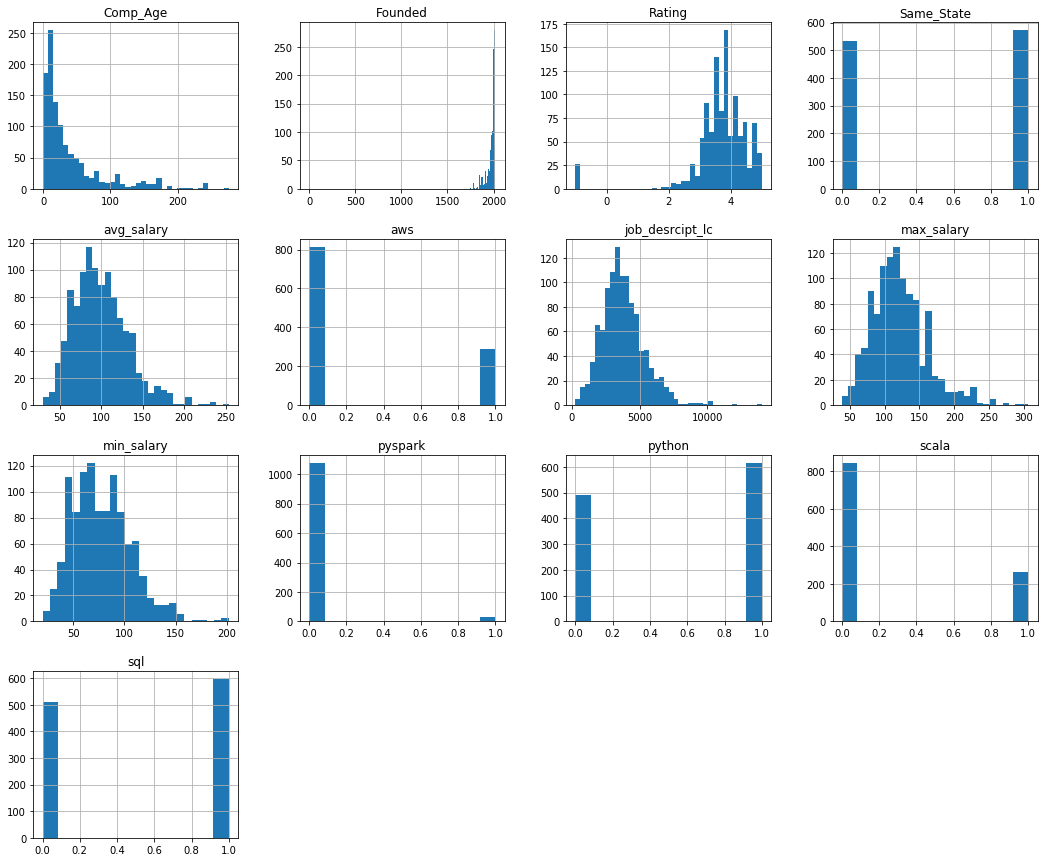

In [406]:
df.hist(figsize=(18,15), bins='auto')

In [394]:
df['Type of ownership'].value_counts()

Company - Private                 620
Company - Public                  275
Nonprofit Organization             82
Subsidiary or Business Segment     59
Government                         27
Unknown                             9
College / University                9
-1                                  8
Other Organization                  6
Hospital                            5
School / School District            2
Contract                            2
Private Practice / Firm             1
Name: Type of ownership, dtype: int64